In [2]:
import pandas as pd

dataset = pd.read_csv('imdb_top_1000.csv')
dataset.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [3]:
dataset.shape


(1000, 16)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
dataset.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
dataset.isnull().sum(axis=1).value_counts()

0    714
1    180
2     71
3     35
Name: count, dtype: int64

In [7]:
dataset.describe()
7.6 to 

SyntaxError: invalid syntax (160953677.py, line 2)

In [ ]:
dataset.head(3)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [ ]:
simple_data = dataset.iloc[1] ##iloc의 경우 index순서를 넣어야 함
print(simple_data)
print('--------' * 20)
# pivot columns to row

Poster_Link      https://m.media-amazon.com/images/M/MV5BM2MyNj...
Series_Title                                         The Godfather
Released_Year                                                 1972
Certificate                                                      A
Runtime                                                    175 min
Genre                                                 Crime, Drama
IMDB_Rating                                                    9.2
Overview         An organized crime dynasty's aging patriarch t...
Meta_score                                                   100.0
Director                                      Francis Ford Coppola
Star1                                                Marlon Brando
Star2                                                    Al Pacino
Star3                                                   James Caan
Star4                                                 Diane Keaton
No_of_Votes                                                162

In [ ]:
del dataset['Poster_Link']

In [ ]:
dataset = dataset.dropna()
# dropna(axis = 1), delete columns 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Overview       714 non-null    object 
 7   Meta_score     714 non-null    float64
 8   Director       714 non-null    object 
 9   Star1          714 non-null    object 
 10  Star2          714 non-null    object 
 11  Star3          714 non-null    object 
 12  Star4          714 non-null    object 
 13  No_of_Votes    714 non-null    int64  
 14  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 89.2+ KB


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
# 필요없는 column 제거
dataset = dataset.drop(columns = ['Overview', 'Certificate'])

# 결측치 제거
dataset = dataset.dropna()

# 결측치 제거 이후 index 재설정하기
dataset.reset_index(drop=False, inplace = True)
dataset.drop(columns = 'index', inplace = True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Runtime        714 non-null    object 
 3   Genre          714 non-null    object 
 4   IMDB_Rating    714 non-null    float64
 5   Meta_score     714 non-null    float64
 6   Director       714 non-null    object 
 7   Star1          714 non-null    object 
 8   Star2          714 non-null    object 
 9   Star3          714 non-null    object 
 10  Star4          714 non-null    object 
 11  No_of_Votes    714 non-null    int64  
 12  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 72.6+ KB
None


In [ ]:
print(dataset['Released_Year'].unique())

['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2019' '2014' '1998' '1997' '1995'
 '1991' '1977' '1954' '2011' '2006' '2000' '1988' '1985' '1968' '1960'
 '1942' '1936' '1931' '2018' '2016' '2017' '2012' '2009' '1981' '1979'
 '1964' '2004' '1992' '1987' '1986' '1984' '1983' '1976' '1973' '1971'
 '1965' '1962' '1959' '1958' '1952' '1944' '1941' '2013' '2007' '2005'
 '1989' '1963' '1950' '1948' '2015' '1996' '1982' '1978' '1967' '1951'
 '1949' '1940' '1939' '1934' '1970' '1969' '1961' '1946' '1930' '1938'
 '1933' 'PG' '1953']


In [ ]:
dataset.replace('PG', '1995', inplace=True)
print(dataset['Released_Year'].unique())

['1994', '1972', '2008', '1974', '1957', ..., '1946', '1930', '1938', '1933', '1953']
Length: 82
Categories (82, object): ['1930', '1931', '1933', '1934', ..., '2016', '2017', '2018', '2019']


In [ ]:
dataset['Released_Year'] = dataset['Released_Year'].astype('category')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Series_Title   714 non-null    object  
 1   Released_Year  714 non-null    category
 2   Runtime        714 non-null    object  
 3   Genre          714 non-null    object  
 4   IMDB_Rating    714 non-null    float64 
 5   Meta_score     714 non-null    float64 
 6   Director       714 non-null    object  
 7   Star1          714 non-null    object  
 8   Star2          714 non-null    object  
 9   Star3          714 non-null    object  
 10  Star4          714 non-null    object  
 11  No_of_Votes    714 non-null    int64   
 12  Gross          714 non-null    object  
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 70.5+ KB
None


In [ ]:
results = []
for i in range(len(dataset['Runtime'])):
    tmp = list(dataset['Runtime'][i])
    tmp = tmp[:-4]
    result = ''.join(s for s in tmp)
    results.append(result)

print(results)

['142', '175', '152', '202', '96', '201', '154', '195', '148', '139', '178', '142', '161', '179', '136', '146', '124', '133', '132', '169', '130', '125', '169', '189', '116', '127', '118', '121', '207', '122', '106', '112', '130', '151', '150', '155', '119', '106', '110', '88', '137', '155', '116', '165', '109', '102', '87', '87', '126', '106', '117', '181', '149', '105', '165', '164', '170', '98', '137', '101', '113', '134', '115', '146', '147', '117', '95', '112', '119', '115', '123', '131', '153', '108', '122', '104', '102', '122', '126', '89', '81', '178', '99', '116', '137', '160', '170', '131', '149', '114', '129', '136', '149', '132', '228', '125', '136', '128', '103', '107', '119', '130', '115', '129', '140', '138', '96', '180', '153', '158', '118', '103', '132', '140', '156', '119', '135', '107', '138', '170', '178', '130', '127', '86', '132', '162', '129', '91', '172', '121', '105', '138', '126', '122', '145', '139', '137', '118', '122', '99', '149', '139', '95', '134', '123'

In [ ]:
dataset.insert(2, 'RealRuntime', results)
dataset.drop(columns = ['Runtime'], inplace = True)
dataset['RealRuntime'] = dataset['RealRuntime'].astype('int64')

ValueError: cannot insert RealRuntime, already exists

In [ ]:
len(dataset)

714

In [ ]:
dataset['Genre'][1]

'Crime, Drama'

In [ ]:
for i in range(len(dataset)): 
    dataset['Genre'][i] = dataset['Genre'][i].replace(' ', '')
print(dataset.head())
print('-----------' * 5)
data_list = dataset['Genre'].str.split(',')
print(data_list)


               Series_Title Released_Year RealRuntime  Runtime  \
0  The Shawshank Redemption          1994         142  142 min   
1             The Godfather          1972         175  175 min   
2           The Dark Knight          2008         152  152 min   
3    The Godfather: Part II          1974         202  202 min   
4              12 Angry Men          1957          96   96 min   

                Genre  IMDB_Rating  Meta_score              Director  \
0               Drama          9.3        80.0        Frank Darabont   
1         Crime,Drama          9.2       100.0  Francis Ford Coppola   
2  Action,Crime,Drama          9.0        84.0     Christopher Nolan   
3         Crime,Drama          9.0        90.0  Francis Ford Coppola   
4         Crime,Drama          9.0        96.0          Sidney Lumet   

            Star1           Star2          Star3           Star4  No_of_Votes  \
0     Tim Robbins  Morgan Freeman     Bob Gunton  William Sadler      2343110   
1   Marl

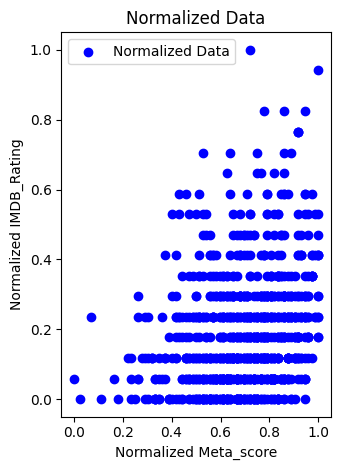

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#아래와 같은 전처리를 통해 조금 더 적절한 관계를 표현할 수 있다. 
# Select only the relevant columns
selected_columns = ['Meta_score', 'IMDB_Rating']
data = dataset[selected_columns]

# MinMaxScaler
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# 그래프 그리기
plt.subplot(1, 2, 2)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c='blue', label='Normalized Data')
plt.title('Normalized Data')
plt.xlabel('Normalized Meta_score')
plt.ylabel('Normalized IMDB_Rating')
plt.legend()

plt.tight_layout()
plt.show()

Text(0, 0.5, 'IMDB_Rating')

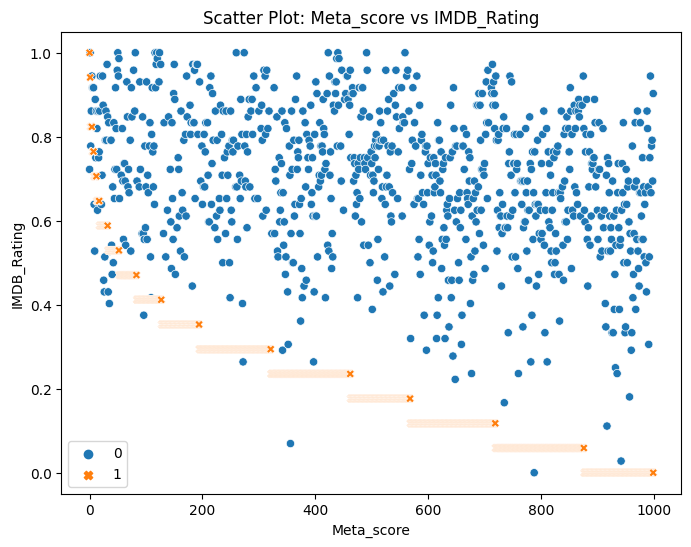

In [12]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=data_normalized, color='b')
plt.title('Scatter Plot: Meta_score vs IMDB_Rating')
plt.xlabel('Meta_score')
plt.ylabel('IMDB_Rating')

